# Algoritmos genéticos con codificación entera

**A diferencia de la codificación binaria, y al igual que la codificación real, cada gen corresponde a una variable**. 

1. **Inicialización**: Se crea una población inicial de individuos, donde cada individuo es un cromosoma que consiste en una secuencia de números enteros. Cada número entero en la secuencia representa un gen. El valor del gen es el valor de una variable de decisión en la solución.
2. **Evaluación**: Cada individuo en la población es evaluado utilizando una función de aptitud (o función objetivo), que mide qué tan buena es la solución representada por el individuo.
3. **Selección**: Se seleccionan individuos de la población para ser padres de la próxima generación. Los individuos son seleccionados con una probabilidad proporcional a su aptitud, por lo que los individuos más aptos tienen más probabilidades de ser seleccionados.
4. **Cruce**: Se seleccionan pares de individuos y se intercambian genes entre ellos para crear descendencia. Con la codificación entera, un operador de cruce común es el cruce de un punto, donde se selecciona un punto en la secuencia de genes y se intercambian los genes a uno o ambos lados del punto.
5. **Mutación**: Con cierta probabilidad baja, se cambian algunos genes en los individuos. Con la codificación entera, una mutación podría implicar cambiar el valor de un gen a otro número entero al azar dentro de un rango permitido.
6. **Reemplazo**: Los individuos de la población actual son reemplazados por los nuevos individuos creados a través de la selección, el cruce y la mutación.
7. **Iteración**: Los pasos de evaluación a reemplazo se repiten durante un número fijo de generaciones, o hasta que se cumpla algún otro criterio de terminación (por ejemplo, encontrar una solución que sea lo suficientemente buena).

### Comparación con otras codificaciones

| Codificación | Ventajas | Desventajas |
| --- | --- | --- |
| Binaria | - Es fácil de implementar y entender.<br>- Los operadores de cruce y mutación son sencillos.<br>- Funciona bien con problemas de optimización binaria. | - No es ideal para problemas de optimización continua.<br>- Puede requerir una gran longitud de cadena para representar ciertos números.<br>- La convergencia puede ser lenta para problemas con un espacio de búsqueda grande. |
| Real | - Funciona bien con problemas de optimización continua.<br>- Puede representar una gama más amplia de valores con menos bits que la codificación binaria.<br>- A menudo converge más rápidamente que la codificación binaria. | - Los operadores de cruce y mutación pueden ser más complejos.<br>- No es ideal para problemas de optimización binaria.<br>- Puede ser más difícil de entender e implementar que la codificación binaria. |
| Entera | - Funciona bien con problemas de optimización que requieren soluciones enteras.<br>- Puede representar una gama más amplia de valores con menos bits que la codificación binaria.<br>- A menudo converge más rápidamente que la codificación binaria. | - Los operadores de cruce y mutación pueden ser más complejos.<br>- No es ideal para problemas de optimización binaria o continua.<br>- Puede ser más difícil de entender e implementar que la codificación binaria. |


### Representación entera para problemas combinatorios

En el caso de la codificación entera, la codificación y decodificación son en realidad bastante directas porque los genes representan directamente los valores de las variables de decisión. 

En las siguientes funciones, la función *encode_integer* toma un valor real y lo redondea al entero más cercano dentro de los límites dados, y la función *decode_integer* toma un valor entero y lo convierte en un valor real dentro de los límites dados.

Es importante tener en cuenta que la codificación y decodificación pueden resultar en la pérdida de precisión debido al redondeo, y que la decodificación no necesariamente recupera exactamente el mismo valor que se codificó originalmente. Sin embargo, esto es generalmente aceptable en el contexto de los algoritmos genéticos, donde estamos buscando soluciones aproximadas en lugar de soluciones exactas.

In [1]:
def encode_integer(x, lower_bound, upper_bound):
    """Codifica un valor real en un valor entero dentro de los límites dados"""
    return int(round((x - lower_bound) / (upper_bound - lower_bound) * (upper_bound - lower_bound)))

def decode_integer(x, lower_bound, upper_bound):
    """Decodifica un valor entero en un valor real dentro de los límites dados"""
    return lower_bound + x * (upper_bound - lower_bound) / (upper_bound - lower_bound)

In [2]:
# Vamos a codificar y decodificar un número real dentro del rango de -10 a 10

# Valores de los límites
lower_bound = -10
upper_bound = 10

# Valor real a codificar
real_value = 3.14159

# Codificar el valor real
encoded_value = encode_integer(real_value, lower_bound, upper_bound)
print(f"Valor real codificado: {encoded_value}")

# Ahora decodificamos el valor codificado
decoded_value = decode_integer(encoded_value, lower_bound, upper_bound)
print(f"Valor decodificado: {decoded_value}")


Valor real codificado: 13
Valor decodificado: 3.0


#### Probando alguna mejora

In [3]:
# Codificación y decodificación de los cromosomas
def encode_integer2(x, lower_bound, upper_bound):
    """Codifica un valor real en un valor entero dentro de los límites dados"""
    return int(round((x - lower_bound) / (upper_bound - lower_bound) * (2**32 - 1)))

def decode_integer2(x, lower_bound, upper_bound):
    """Decodifica un valor entero en un valor real dentro de los límites dados"""
    return lower_bound + x * (upper_bound - lower_bound) / (2**32 - 1)

In [4]:
# Vamos a codificar y decodificar un número real dentro del rango de -10 a 10

# Valores de los límites
lower_bound = -10
upper_bound = 10

# Valor real a codificar
real_value = 3.14159

# Codificar el valor real
encoded_value = encode_integer2(real_value, lower_bound, upper_bound)
print(f"Valor real codificado: {encoded_value}")

# Ahora decodificamos el valor codificado
decoded_value = decode_integer2(encoded_value, lower_bound, upper_bound)
print(f"Valor decodificado: {decoded_value}")

Valor real codificado: 2822134963
Valor decodificado: 3.141590001327355


En el contexto de las codificaciones en algoritmos genéticos, la multiplicación o división por $(2^{32} - 1)$ se utiliza para mapear un valor real dentro de un rango determinado a un valor entero en el rango permitido por la representación de cromosomas en el algoritmo genético.

La multiplicación por $(2^{32} - 1)$ se utiliza en la función encode_integer para codificar un valor real en un valor entero. La expresión $(2^{32} - 1)$ representa el rango máximo de valores enteros que se pueden representar utilizando 32 bits, que es comúnmente utilizado en la representación de cromosomas en algoritmos genéticos.

| Ventajas | Descripción |
| :--- | :--- |
| **Representación directa** | Los genes representan directamente los valores de las variables de decisión. | 
| **Facilidad de uso** | Las operaciones de codificación y decodificación son sencillas. |
| **Flexibilidad** | Se pueden usar una variedad de operadores de cruce y mutación. | 
| **Adecuado para ciertos problemas** | Es especialmente útil en problemas donde las variables de decisión son intrínsecamente enteras. | 



#### ¿Cuándo conviene usar codificación real?

La codificación entera en algoritmos genéticos utiliza números enteros para representar directamente el valor de las variables de decisión. 

| Caso | Descripción |
| :--- | :--- |
| **Problemas de horarios** | En problemas de programación de horarios, como la asignación de turnos de trabajo o la programación de exámenes, las variables de decisión a menudo representan tiempos discretos, lo que hace que la codificación entera sea una opción natural. |
| **Problemas de enrutamiento** | En problemas de enrutamiento, como el problema del viajante de comercio o el problema de enrutamiento de vehículos, las variables de decisión a menudo representan secuencias de ciudades o destinos, lo que puede ser representado de manera efectiva con la codificación entera. |
| **Problemas de diseño y configuración** | En problemas de diseño y configuración, como el diseño de circuitos electrónicos o la configuración de sistemas, las variables de decisión pueden representar la selección y colocación de componentes discretos, lo que puede ser representado eficazmente con la codificación entera. |
| **Problemas con restricciones de integridad** | En cualquier problema en el que las variables de decisión deben ser enteras debido a restricciones de integridad, la codificación entera es la elección obvia. |



### Ejercicio: 

- Codificar un número decimal (real) a codificación entera dados 3 límites diferentes.
- Codificar un vector de números decimales (reales). 

In [7]:
# Vamos a codificar y decodificar un número real dentro del rango de -10 a 10

# Valores de los límites
lower_bound = -5
upper_bound = 5

# Valor real a codificar
real_value = 10.925

# Codificar el valor real
encoded_value = encode_integer2(real_value, lower_bound, upper_bound)
print(f"Valor real codificado: {encoded_value}")

# Ahora decodificamos el valor codificado
decoded_value = decode_integer2(encoded_value, lower_bound, upper_bound)
print(f"Valor decodificado: {decoded_value}")

Valor real codificado: 6839735417
Valor decodificado: 10.924999999330613


In [17]:
# Vamos a codificar y decodificar un número real dentro del rango de -10 a 10
import numpy as np
# Valores de los límites
lower_bound = -10
upper_bound = 10

# Valor real a codificar
real_values = 10*np.random.rand(5)
print(real_values)

encoded_values = []
for i in range(len(real_values)):
    # Codificar el valor real
    encoded_values.append(encode_integer2(real_values[i], lower_bound, upper_bound))
print(encoded_values)

# Ahora decodificamos el valor codificado
decoded_values = []
for i in range(len(real_values)):
    # Codificar el valor real
    decoded_values.append(decode_integer2(encoded_values[i], lower_bound, upper_bound))
print(decoded_values)
print(len(real_values), len(encoded_values), len(decoded_values))

[9.37001093 3.7180409  3.92751961 8.40067397 2.94213967]
[4159678172, 2945926851, 2990912061, 3951514646, 2779303330]
[9.370010928104168, 3.718040900704926, 3.9275196087377893, 8.400673973001698, 2.942139667678191]
5 5 5


## Operadores genéticos para representación entera

| Operador | Codificación Binaria | Codificación Entera |
| :--- | :--- | :--- |
| **Cruce** | Opera directamente sobre los bits. Ejemplos: cruce de un punto, cruce de dos puntos, cruce uniforme. | Opera sobre números enteros completos. Ejemplos: cruce aritmético, cruce por orden (para secuencias o permutaciones). |
| **Mutación** | Usualmente invierte un bit (0 se convierte en 1, 1 se convierte en 0). | Puede agregar o sustraer una cantidad pequeña al valor de un gen, o puede cambiar un gen a un nuevo valor aleatorio dentro de un rango permitido. |
| **Selección** | Independiente de la codificación. Selecciona los mejores individuos de la población basándose en su aptitud. | Independiente de la codificación. Selecciona los mejores individuos de la población basándose en su aptitud. |

### Operadores de cruce

| Operador de Cruce | Descripción | Ejemplo de Implementación en Python |
| :--- | :--- | :--- |
| **Cruce de un punto** | Intercambia segmentos después de un punto de cruce. | ```punto = random.randint(1, len(parent1)-1) ``` |
|  | | ```return parent1[:punto] + parent2[punto:], parent2[:punto] + parent1[punto:]``` |
| **Cruce de dos puntos** | Intercambia segmentos entre dos puntos de cruce. |
| **Cruce uniforme** | Intercambia genes individuales con probabilidad igual. | |
| **Cruce Aritmético**      | Combina los genes de los padres mediante una media ponderada o una combinación lineal. | ```child1 = alpha * parent1 + (1 - alpha) * parent2```|
| | | ```child2 = (1 - alpha) * parent1 + alpha * parent2```|


**Usaremos la cruza de un punto.**

![](https://www.tutorialspoint.com/genetic_algorithms/images/one_point_crossover.jpg)
Fuente: tutorialspoints.com
 
#### Ejercicio: Implementar operador de cruza de un punto y aplicar a dos pares de padres diferentes.



In [29]:
def cruza_aritmetica(padre1, padre2, alpha=0.3):
    """
    Escribir operaciones
    """
    hijo1= alpha * padre1 + (1 - alpha) * padre2
    hijo2 = (1 - alpha) * padre1 + alpha * padre2
    return np.int64(hijo1), np.int64(hijo2)

### Si generan a los padres como numeros reales
# padre1 = encode_integer2(np.random.rand(2))
# padre2 = encode_integer2(np.random.rand(2))

# hijo1, hijo2 = cruza(padre1, padre2)
# hijo1 = decode_integer2(hijo1)
# hijo2 = decode_integer2(hijo2)


### Si generan a los padres como numeros reales
padre1 = np.random.randint(0, 10, size=5)
padre2 = np.random.randint(0, 10, size=5)

hijo1, hijo2 = cruza_aritmetica(padre1, padre2)
print("padres:", padre1, padre2)
print("hijos:", hijo1, hijo2)

padres: [3 8 8 0 1] [2 0 7 2 8]
hijos: [2 2 7 1 5] [2 5 7 0 3]


### Operador de mutación uniforme

In [30]:
import random

def mutacion_uniforme(individual, min_val, max_val, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(min_val, max_val)
    return individual

In [33]:
individuo = np.random.randint(0,10,5)
mutacion_uniforme(individuo, min_val=0, max_val=10)

array([2, 3, 5, 6, 9])

#### Ejercicio: mutar varios individuos

## Optimizar una función con codificación entera

In [64]:
import random

# Definición de la función objetivo (función cuadrática)
def funcion_objetivo(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 2)**2

# Codificación y decodificación de los cromosomas
def encode_integer(x, lower_bound, upper_bound):
    """Codifica un valor real en un valor entero dentro de los límites dados"""
    return int(round((x - lower_bound) / (upper_bound - lower_bound) * (2**32 - 1)))

def decode_integer(x, lower_bound, upper_bound):
    """Decodifica un valor entero en un valor real dentro de los límites dados"""
    return lower_bound + x * (upper_bound - lower_bound) / (2**32 - 1)

# Operador de cruza de un punto
def cruce_un_punto(parent1, parent2):
    punto = random.randint(1, len(parent1) - 1)
    child1 = parent1[:punto] + parent2[punto:]
    child2 = parent2[:punto] + parent1[punto:]
    return child1, child2

# Operador de mutación uniforme
def mutacion_uniforme(individual, min_val, max_val, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(min_val, max_val)
    return individual

In [66]:
# Crear la población inicial
pop_size = 500
min_val, max_val = 0, 10
population = [[random.uniform(min_val, max_val), random.uniform(min_val, max_val)] for _ in range(pop_size)]

# Parámetros del algoritmo genético
num_generations = 100
num_parents = pop_size // 2

# Ejecutar el algoritmo genético
for gen in range(num_generations):
    # Evaluar la población
    fitnesses = [funcion_objetivo(individual) for individual in population]

    # Seleccionar los mejores individuos
    parents = [population[i] for i in sorted(range(len(fitnesses)), key=lambda k: fitnesses[k])[:num_parents]]

    # Generar la próxima generación
    children = []
    for i in range(0, len(parents), 2):
        if i + 1 < len(parents):
            child1, child2 = cruce_un_punto(parents[i], parents[i + 1])
            children.append(mutacion_uniforme(child1, min_val, max_val))
            children.append(mutacion_uniforme(child2, min_val, max_val))
    population = parents + children

In [67]:
# Mostrar el mejor individuo encontrado
best_individual = min(population, key=funcion_objetivo)
best_solution = [decode_integer(x, min_val, max_val) for x in best_individual]
print("Mejor solución encontrada:", best_solution)
print("Valor objetivo de la mejor solución:", funcion_objetivo(best_solution))

Mejor solución encontrada: [6.984919311242392e-09, 4.656612874161595e-09]
Valor objetivo de la mejor solución: 12.999999939464033


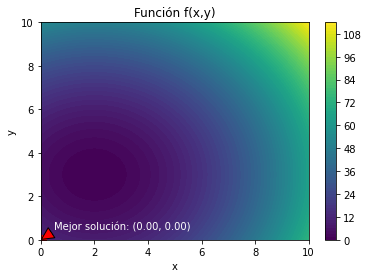

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Definición de la función objetivo (función cuadrática)
def funcion_objetivo(x1, x2):
    return (x1 - 3)**2 + (x2 - 2)**2

# Definir el rango de valores para x e y
x_range = np.linspace(0, 10, 100)
y_range = np.linspace(0, 10, 100)

# Calcular los valores de z para cada combinación de x e y
z = np.array([[funcion_objetivo(x, y) for y in y_range] for x in x_range])

# Graficar la función f
fig, ax = plt.subplots()
cmap = ax.contourf(x_range, y_range, z, levels=100, cmap='viridis')
fig.colorbar(cmap)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función f(x,y)')

# Decodificar el mejor individuo encontrado
best_x, best_y = [decode_integer(xi, min_val, max_val) for xi in best_individual]

# Graficar la solución encontrada
ax.plot([best_x], [best_y], 'ro', markersize=10)
ax.annotate(f'Mejor solución: ({best_x:.2f}, {best_y:.2f})', 
            (best_x, best_y), xytext=(best_x+0.5, best_y+0.5), 
            arrowprops=dict(facecolor='red', shrink=0.05), c="w")

plt.show()

### Ejercicio: ¿Qué está pasando? Mejorar la solución moviendo hiperparámetros

## Va de nuevo el problema de la mochila

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/729px-Knapsack.svg.png)

In [111]:
import random
import numpy as np

def init_population_integer(pop_size, num_objects):
    """Inicializa una población con codificación entera"""
    population = []
    for _ in range(pop_size):
        # en random.randint(0, Fmax), Fmax indica la frecuencia máxima
        # que puede tener un objeto.
        individual = [random.randint(0, 10) for _ in range(num_objects)]
        population.append(individual)
    return population

def tournament_selection(population, objects, capacity, tournament_size):
    """Realiza la selección de padres utilizando el método de torneo"""
    selected_parents = []
    for _ in range(2):  # Seleccionar 2 padres
        tournament = random.sample(population, tournament_size)
        best_individual = None
        best_fitness = -1
        for individual in tournament:
            fitness = evaluate_individual_integer(individual, objects, capacity)
            if fitness > best_fitness:
                best_individual = individual
                best_fitness = fitness
        selected_parents.append(best_individual)
    return selected_parents

def evaluate_individual_integer(individual, objects, capacity):
    """Evalúa el fitness de un individuo codificado con enteros en el problema de la mochila"""
    total_value = 0
    total_weight = 0
    for i, freq in enumerate(individual):
        total_value += objects[i]["valor"] * freq
        total_weight += objects[i]["peso"] * freq
    if total_weight > capacity:
        return 0  # Penalización por exceder la capacidad de la mochila
    else:
        return total_value

# Codificación y decodificación de los cromosomas
def encode_integer(x, lower_bound, upper_bound):
    """Codifica un valor real en un valor entero dentro de los límites dados"""
    return int(round((x - lower_bound) / (upper_bound - lower_bound) * (2**32 - 1)))

def decode_integer(x, lower_bound, upper_bound):
    """Decodifica un valor entero en un valor real dentro de los límites dados"""
    return lower_bound + x * (upper_bound - lower_bound) / (2**32 - 1)

# Operador de cruza de un punto
def cruce_un_punto(parent1, parent2):
    punto = random.randint(1, len(parent1) - 1)
    child1 = parent1[:punto] + parent2[punto:]
    child2 = parent2[:punto] + parent1[punto:]
    return child1, child2

# Operador de mutación uniforme
def mutacion_uniforme(individual, min_val, max_val, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(min_val, max_val)
    return individual

# Función principal del algoritmo genético
def genetic_algorithm(objects, capacity, pop_size, num_generations, mutation_rate, tournament_size):
    # Inicialización de la población
    num_objects = len(objects)
    population = init_population_integer(pop_size, num_objects)
    best_individual = None
    best_fitness = -1
    
    # Evolución de la población
    for i in range(num_generations):
        # Selección de padres
        parent1, parent2 = tournament_selection(population, objects, capacity, tournament_size)
        
        # Cruce
        child1, child2 = cruce_un_punto(parent1, parent2)
        
        # Mutación
        child1 = mutacion_uniforme(child1, 0, 5, mutation_rate)
        child2 = mutacion_uniforme(child2, 0, 5, mutation_rate)
        
        # Evaluación de la descendencia
        child1_fitness = evaluate_individual_integer(child1, objects, capacity)
        child2_fitness = evaluate_individual_integer(child2, objects, capacity)
        
        # Reemplazo de la peor solución de la población con la mejor descendencia
        population.sort(key=lambda x: evaluate_individual_integer(x, objects, capacity))
        if child1_fitness > child2_fitness:
            if child1_fitness > evaluate_individual_integer(population[0], objects, capacity):
                population[0] = child1
                if child1_fitness > best_fitness:
                    best_individual = child1
                    best_fitness = child1_fitness
        else:
            if child2_fitness > evaluate_individual_integer(population[0], objects, capacity):
                population[0] = child2
                if child2_fitness > best_fitness:
                    best_individual = child2
                    best_fitness = child2_fitness
    
    # Devolución de la mejor solución encontrada
    return (best_individual, best_fitness)


In [112]:
# Definición de los objetos y sus propiedades (valor y peso)
objects = [
    {"valor": 10.5, "peso": 5.2},
    {"valor": 20.1, "peso": 10.1},
    {"valor": 30.9, "peso": 15.2},
    {"valor": 40.7, "peso": 20.8},
    {"valor": 50.1, "peso": 25.4}
]


# Capacidad máxima de la mochila
capacity = 100

# Parámetros del algoritmo genético
pop_size = 100
num_generations = 100
mutation_rate = 0.01
tournament_size = 5

In [113]:
# Resolver el problema de la mochila utilizando el algoritmo genético
best_individual, best_fitness = genetic_algorithm(objects, capacity, pop_size, num_generations, mutation_rate, tournament_size)

# Imprimir la mejor solución encontrada
print("Mejor solución encontrada:")
for i, obj in enumerate(objects):
    index = i % len(best_individual)
    freq = best_individual[index]
    print(f"Objeto {i+1}: Valor = {obj['valor']}, Peso = {obj['peso']}, Frecuencia = {freq}")
print("Fitness:", best_fitness)
print("Mejor individuo:", best_individual)

Mejor solución encontrada:
Objeto 1: Valor = 10.5, Peso = 5.2, Frecuencia = 3
Objeto 2: Valor = 20.1, Peso = 10.1, Frecuencia = 0
Objeto 3: Valor = 30.9, Peso = 15.2, Frecuencia = 4
Objeto 4: Valor = 40.7, Peso = 20.8, Frecuencia = 1
Objeto 5: Valor = 50.1, Peso = 25.4, Frecuencia = 0
Fitness: 195.8
Mejor individuo: [3, 0, 4, 1, 0]


### Práctica. Probar código y algoritmo genético con otros objetos y describir los resultados de lo que podría guardarse en la mochila. Describir ventajas de utilizar codificación entera en comparación con la binaria.

In [114]:
# Definición de los objetos y sus propiedades (valor y peso)
objects = [
    {"valor": 10.5, "peso": 5.2},
    {"valor": 20.1, "peso": 10.1},
    {"valor": 30.9, "peso": 15.2},
    {"valor": 40.7, "peso": 2.8},
    {"valor": 50.1, "peso": 2.4},
    {"valor": 4.1, "peso": 2.4},
    {"valor": 1.1, "peso": 7.4},
    {"valor": 14.1, "peso": 2.4},
    {"valor": 36.1, "peso": 0.4},
    {"valor": 20, "peso": 5.4}
]


# Capacidad máxima de la mochila
capacity = 10000

# Parámetros del algoritmo genético
pop_size = 100
num_generations = 100
mutation_rate = 0.8
tournament_size = 5

# Resolver el problema de la mochila utilizando el algoritmo genético
best_individual, best_fitness = genetic_algorithm(objects, capacity, pop_size, num_generations, mutation_rate, tournament_size)

# Imprimir la mejor solución encontrada
print("Mejor solución encontrada:")
for i, obj in enumerate(objects):
    index = i % len(best_individual)
    freq = best_individual[index]
    print(f"Objeto {i+1}: Valor = {obj['valor']}, Peso = {obj['peso']}, Frecuencia = {freq}")
print("Fitness:", best_fitness)
print("Mejor individuo:", best_individual)

Mejor solución encontrada:
Objeto 1: Valor = 10.5, Peso = 5.2, Frecuencia = 2
Objeto 2: Valor = 20.1, Peso = 10.1, Frecuencia = 5
Objeto 3: Valor = 30.9, Peso = 15.2, Frecuencia = 9
Objeto 4: Valor = 40.7, Peso = 2.8, Frecuencia = 10
Objeto 5: Valor = 50.1, Peso = 2.4, Frecuencia = 7
Objeto 6: Valor = 4.1, Peso = 2.4, Frecuencia = 2
Objeto 7: Valor = 1.1, Peso = 7.4, Frecuencia = 0
Objeto 8: Valor = 14.1, Peso = 2.4, Frecuencia = 7
Objeto 9: Valor = 36.1, Peso = 0.4, Frecuencia = 2
Objeto 10: Valor = 20, Peso = 5.4, Frecuencia = 4
Fitness: 1416.4
Mejor individuo: [2, 5, 9, 10, 7, 2, 0, 7, 2, 4]
